In [1]:
import pandas as pd
import numpy as np

import konlpy
from gensim.models import Word2Vec 

In [2]:
#CSV파일 불러오기
origin = pd.read_csv("../../nlp_poem.csv")
poem = origin

poem_idf_ranking = pd.read_csv("TF-IDF/poem_tf_idf_ranking.csv")
poem_LDA_ranking = pd.read_csv("LDA/poem_LDA_ranking_more_20P.csv")

In [3]:
#모델 불러오기
poem_word2vec = Word2Vec.load('poem_labeling_word2vec')

FileNotFoundError: [Errno 2] No such file or directory: 'poem_labeling_word2vec'

# 레이블링 테이블 생성

### 레이블링 전

In [207]:
poem_before_labeling = poem_idf_ranking

In [208]:
poem_before_labeling[['LDA_1st', 'LDA_2nd', 'LDA_3rd']] = poem_LDA_ranking[['0', '1', '2']]

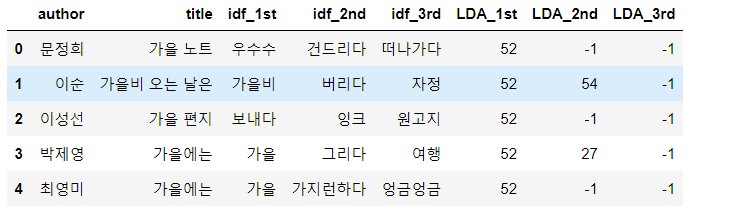

### 레이블링 후

In [210]:
poem_after_labeling = pd.DataFrame(index = range(len(poem_before_labeling)), columns=['사랑', '자연', '절망', '죽음', '행복', '슬픔', '좋다', '우정', '가족', '밤', '동물', '계절', '일생', '기억', '신체', '물건', '색깔', '동네', '조용하다', '음식', '날씨', '차분해지다', '사색', '여행', '동화', '감성'])
poem_after_labeling = poem_after_labeling.fillna(0)

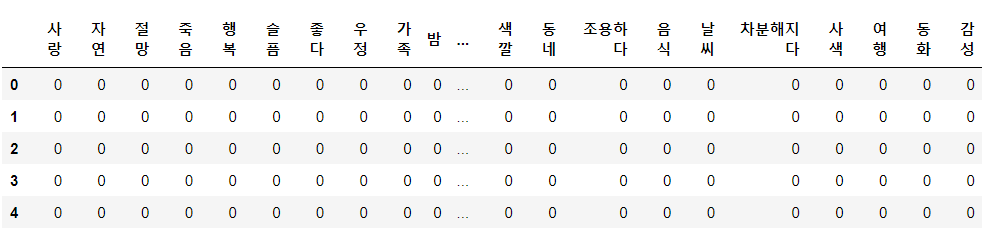

# 레이블링 함수

### LDA

In [ ]:
"""
    엑셀 파일에서 수기로 입력한 토픽의 제목을 딕셔너리로 입력하는 알고리즘,
    직접 입력해야함
    한번만 입력하면 되기 때문에 실수로 또 실행하지 않도록 주석처리 해놓음
"""

In [212]:
# #LDA 토픽 매칭 작성

# not_index_list = [num for num in (1, 5, 11, 14, 15, 17, 20, 24, 29, 33, 35, 36, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 56, 58, 59, 61, 68)]
# index_list = list(range(70))

# for i in not_index_list:
#     index_list.remove(i)

# LDA_dict = {}
# for key in index_list:
#     input_word = input(str(key))

#     word_list = []
#     for word in (input_word.split(',')):
#         word_list.append(word)

#     LDA_dict[key] = word_list

In [213]:
LDA_dict

{0: ['자연'],
 2: ['동물'],
 3: ['일생'],
 4: ['신체'],
 6: ['여행'],
 7: ['사색'],
 8: ['밤', '사색'],
 9: ['죽음', '절망'],
 10: ['가족', '일생'],
 12: ['물건', '자연'],
 13: ['자연', '동물'],
 16: ['동네'],
 18: ['일생', '사색'],
 19: ['동네'],
 21: ['음식'],
 22: ['사색'],
 23: ['동네', '일생'],
 25: ['감성'],
 26: ['계절'],
 27: ['계절'],
 28: ['가족'],
 30: ['동물'],
 31: ['가족'],
 32: ['동네'],
 34: ['자연', '동물'],
 37: ['감성', '자연'],
 38: ['동네'],
 41: ['물건', '기억'],
 49: ['사랑', '사색'],
 52: ['슬픔'],
 54: ['날씨', '감성', '계절'],
 55: ['계절'],
 57: ['가족'],
 60: ['계절'],
 62: ['자연'],
 63: ['차분해지다'],
 64: ['일생', '기억'],
 65: ['동네'],
 66: ['가족'],
 67: ['일생', '슬픔'],
 69: ['가족']}

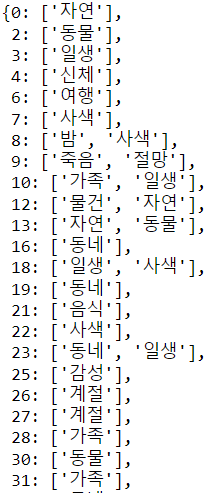

### TF-IDF

In [215]:
def change_word(vec_word):
    """
        word2vec모델로 키워드를 매칭할 때 매칭 단어와 실제 클래스가 달라서 매칭단어를 클래스로 변환하는 함수
        change_word함수가 필요한 이유는 '꽃'을 매칭 단어로 '자연'을 사용할 때 보다 '풀'을 사용할 때
        더 높은 확률로 비슷하다고 인식하기 때문
    """
    if vec_word == '풀':
        vec_word = '자연'
    elif  vec_word == '잊다':
        vec_word = '죽음'
    elif  vec_word == '도망':
        vec_word = '슬픔'
    elif  vec_word == '아버지':
        vec_word = '가족'
    elif  vec_word == '새벽':
        vec_word = '밤'
    elif  vec_word == '송아지':
        vec_word = '동물'
    elif  vec_word == '머리':
        vec_word = '신체'
    elif  vec_word == '바퀴':
        vec_word = '물건'
    elif  vec_word == '붉다':
        vec_word = '색깔'
    elif  vec_word == '시골':
        vec_word = '동네'
    elif  vec_word == '보리밥':
        vec_word = '음식'
    elif  vec_word == '비':
        vec_word = '날씨'
    elif  vec_word == '음미':
        vec_word = '사색'
    elif  vec_word == '별빛':
        vec_word = '동화'
    elif  vec_word == '구름':
        vec_word = '감성'
    
    return vec_word

        
def check_idf(word):
    """
        tf-idf를 적용한, 편지에서 가장 많이 나온 단어를 word2vec으로 키워드 매칭하고
        가장 유사한 키워드를 반환하는 함수
    """
    
    search_list = []
    for vec_word in ['사랑', '풀', '절망', '잊다', '행복', '도망', '좋다', '우정', '아버지', '새벽', '송아지', '계절', '일생', '기억', '머리', '바퀴', '붉다', '시골', '조용하다', '보리밥', '비', '차분해지다', '음미', '여행', '별빛', '구름']:
        score = poem_word2vec.wv.similarity(vec_word, word)
        search_list.append((change_word(vec_word), score))
    
    first = sorted(search_list, key = lambda x: (x[1]), reverse=True)[1][0]
    
    return first

### 숫자 레이블링

In [218]:
from tqdm import trange, notebook # show progress-bar

# 인덱스 하나씩 확인, 즉 하나의 row씩 확인
for index in notebook.tqdm(range(len(poem_before_labeling))):
    # 하나의 컬럼씩 확인
    for i, col in enumerate(poem_before_labeling.columns):
        #컬럼이 idf_1st일때
        if col == 'idf_1st':
            word = poem_before_labeling.iloc[index][col]
            # word2vec매칭 함수를 적용하고, poem_after_labeling의 해당하는 컬럼에 1저장
            poem_after_labeling.loc[index, check_idf(word)] = 1
        elif col == 'idf_2nd':
            word = poem_before_labeling.iloc[index][col]
            poem_after_labeling.loc[index, check_idf(word)] = 1
        elif col == 'idf_3rd':
            word = poem_before_labeling.iloc[index][col]
            poem_after_labeling.loc[index, check_idf(word)] = 1
        #컬럼이 LDA_1st일때
        elif col == 'LDA_1st':
            # LDA_1st의 값을 가져와서
            topics = poem_before_labeling.iloc[index][col]
            # 토픽의 값이 -1이 아니면,
            if topics != -1:
                #토픽의 값을 가져와서 poem_after_labeling의 해당하는 컬럼에 1저장
                #for문을 사용한 이유는 ['밤', '사색'] 등 클래스가 두개씩 매칭된 토픽도 있기 때문
                for topic in LDA_dict[topics]:
                    poem_after_labeling.loc[index, topic] = 1
        elif col == 'LDA_2nd':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    poem_after_labeling.loc[index, topic] = 1
        elif col == 'LDA_3rd':
            topics = poem_before_labeling.iloc[index][col]
            if topics != -1:
                for topic in LDA_dict[topics]:
                    poem_after_labeling.loc[index, topic] = 1

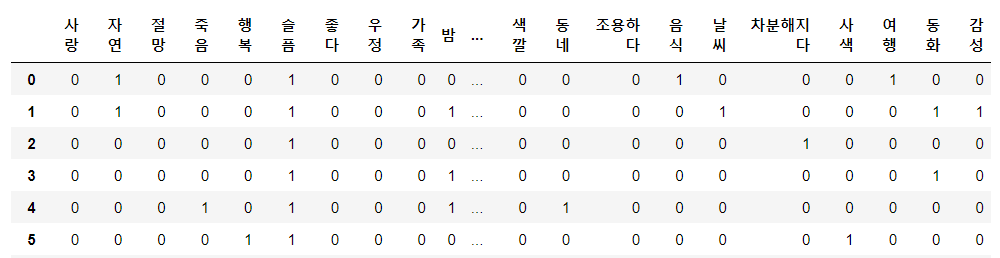

In [ ]:
poem_after_labeling[['author', 'title', 'content']] == poem_before_labeling[['author', 'title', 'content']]

In [ ]:
poem_after_labeling.to_csv("final_poem_label.csv", index=False)